## Building a synthetic model

In [3]:
import sys
sys.path.insert(0, 'C:\\Software\\BERT')
import pybert as pb
print(pb.__file__)
import pygimli as pg
import pygimli.meshtools as mt
import numpy as np

C:\Software\BERT\pybert\__init__.py


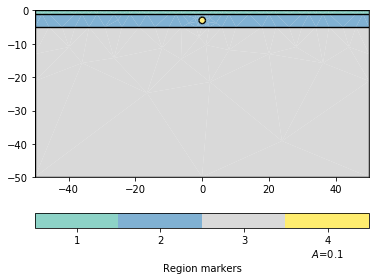

In [4]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-1, -5], worldMarker=1)
# Create some heterogeneous circle and merge with world
block = mt.createCircle(pos=[0, -3.], radius=1, marker=4, boundaryMarker=10, area=0.1)
geom = mt.mergePLC([world, block])
pg.show(geom);

In [5]:
# place electrodes in the mesh and refine them
xEl = np.linspace(-10, 10, 21)
[geom.createNode((x, 0, 0), -99) for x in xEl]
[geom.createNode((x, -0.1, 0)) for x in xEl]
mesh = mt.createMesh(geom)
scheme = pb.createData(elecs=xEl, schemeName='dd')

C:\Software\BERT\pygimli\mplviewer\colorbar.py:370: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(cMin, cMax)


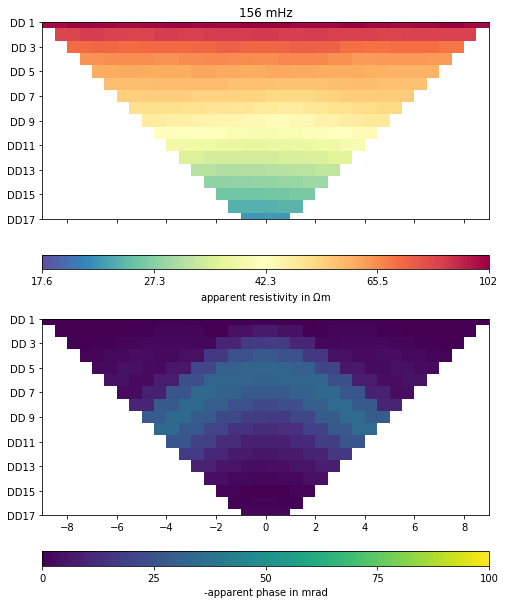

In [10]:
#                dumm, La   2.S   3.S   Body
rhovec = np.array([0,  100.0, 50.0, 10.0, 100])  # ohm m
tauvec = np.array([0,   1e-3, 1e-3,  1e-3,   1.0])  # s
mvec = np.array([0.001, 0.01, 0.001,  0.1,   0.5])  # - [0-1]
cvec = np.array([0.5,    0.5,  0.5,  0.5,   0.5])  # - [0-0.5]
frvec = [0.156, 0.312, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 125, 250, 500, 1000]
fdip = pb.FDIPdata(f=frvec, data=scheme)
fdip.simulate(mesh, rhovec, tauvec, mvec, cvec)
fdip.generateDataPDF(ipmax=100)

nr= [  7  25  42  58  73  87 100 112 123 133 142]


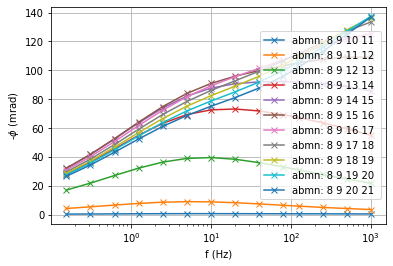

In [13]:
fdip.showDataSpectra(ab=[8, 9]);

In [12]:
fdip.simultaneousInversion()

13/02/20 - 05:26:51 - pyGIMLi - INFO - estimate data error


creating mesh...
Mesh: Nodes: 662 Cells: 1214 Boundaries: 1875
Mesh: Nodes: 662 Cells: 1214 Boundaries: 1875
2D PD: Mesh: Nodes: 353 Cells: 612 Boundaries: 964
3D PD: Mesh: Nodes: 5295 Cells: 8568 Boundaries: 2512
2394 8568 8568
2394 8568
0.0004157080201725547 7.46942652219684
